In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.viz import boxplot, histogram, barplot

In [3]:
path = 'data/UserFeedbackData.csv'
df = pd.read_csv(path, index_col=0)
df.head(3)

,content,score,TU_count,app_id,app_name,RC_ver
review_id,,,,,,
1_1,"Ever since the update, there's a weird glitch ...",3,22930,com.zhiliaoapp.musically,TikTok,29.6.4
1_2,Don't believe the news!!! You can absolutely c...,5,18518,com.zhiliaoapp.musically,TikTok,29.6.4
1_3,Great app. Too many ads. If you saw a video an...,4,3467,com.zhiliaoapp.musically,TikTok,29.8.4


**FULL EDA**

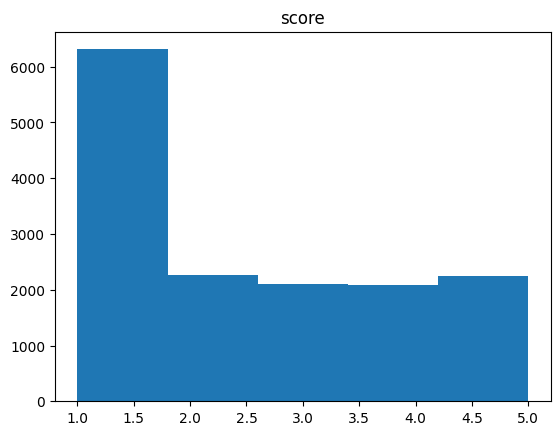

In [5]:
histogram(df['score'], 'score', bins=5)

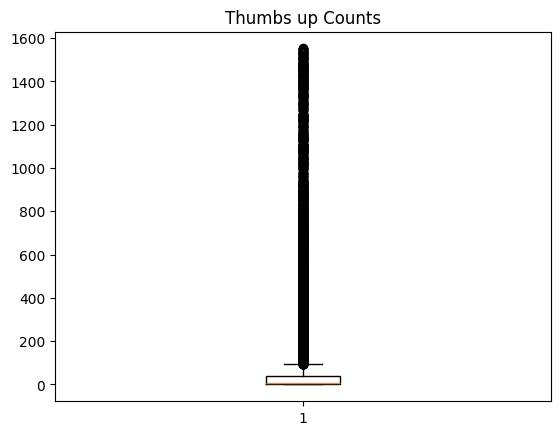

In [7]:
perc_top =np.percentile(df['TU_count'].values, 95)
tu_counts = df[df['TU_count'] < perc_top]['TU_count'].values
boxplot(tu_counts, 'Thumbs up Counts')

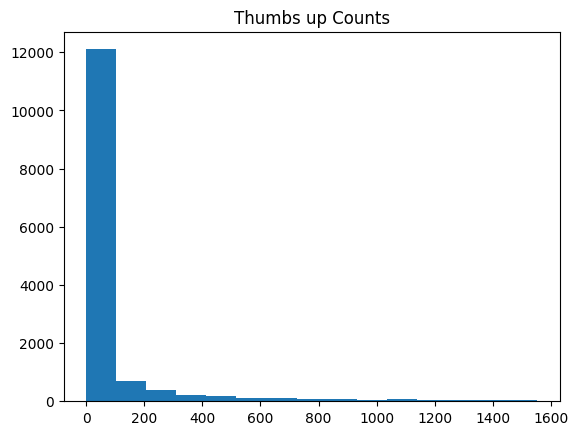

In [8]:
histogram(tu_counts, 'Thumbs up Counts', bins=15)

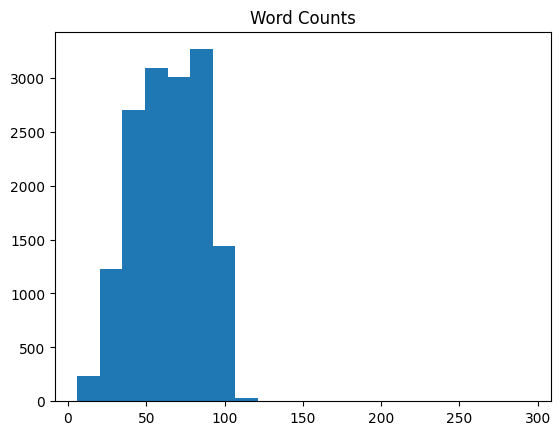

In [14]:
word_counts = df['content'].str.split().str.len()
histogram(word_counts, 'Word Counts', bins=20)

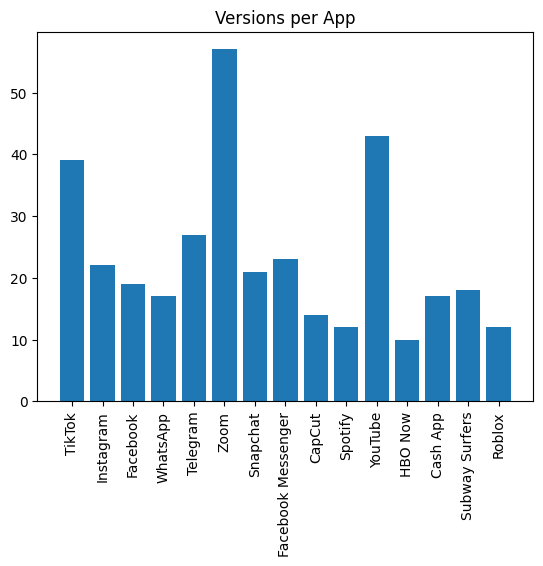

In [ ]:
app_names = df['app_name'].unique()
ver_counts = []
for name in app_names:
    cur_df = df[df['app_name'] == name]
    vers = cur_df['RC_ver'].unique()
    ver_counts.append(len(vers))

barplot(ver_counts, app_names, 'Versions per App')   

**SPECIFIC APP**

In [18]:
def full_analysis(cur_df):

    """Plots two histograms and one boxplot in a single figure with subplots."""
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))

    ax[0].hist(cur_df['score'], bins=5, edgecolor='black', alpha=0.7)
    ax[0].set_title("Scores")

    perc_top =np.percentile(cur_df['TU_count'].values, 95)
    tu_counts = cur_df[cur_df['TU_count'] < perc_top]['TU_count'].values
    ax[1].hist(tu_counts, bins=15, edgecolor='black', alpha=0.7)
    ax[1].set_title("TU counts")

    # Boxplot
    ax[2].boxplot(tu_counts)
    ax[2].set_title("TU counts Boxplot")

    word_counts = cur_df['content'].str.split().str.len()
    ax[3].hist(word_counts, bins=15, edgecolor='black', alpha=0.7)

    # Show all plots together
    plt.tight_layout()
    plt.show()

======== TikTok =======


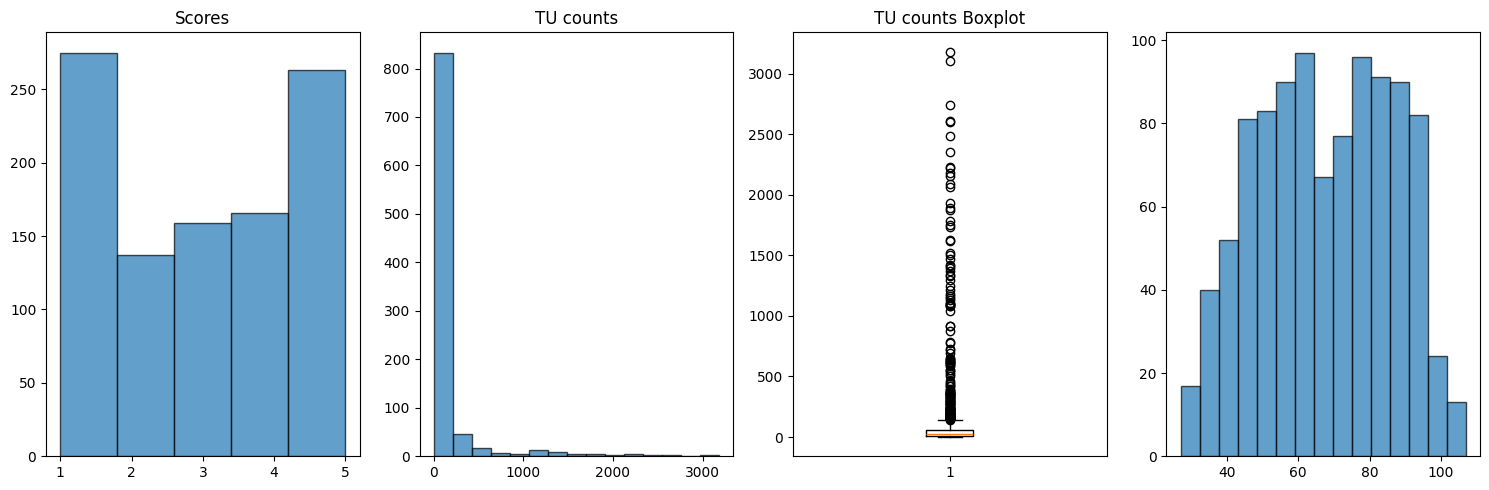

======== Instagram =======


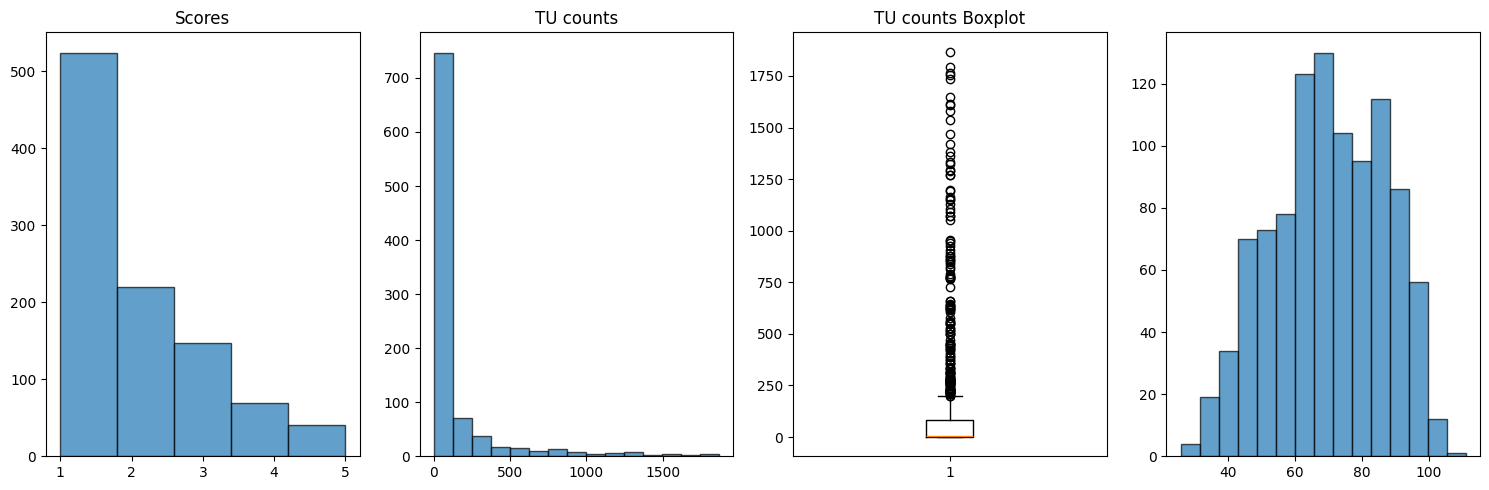

======== Facebook =======


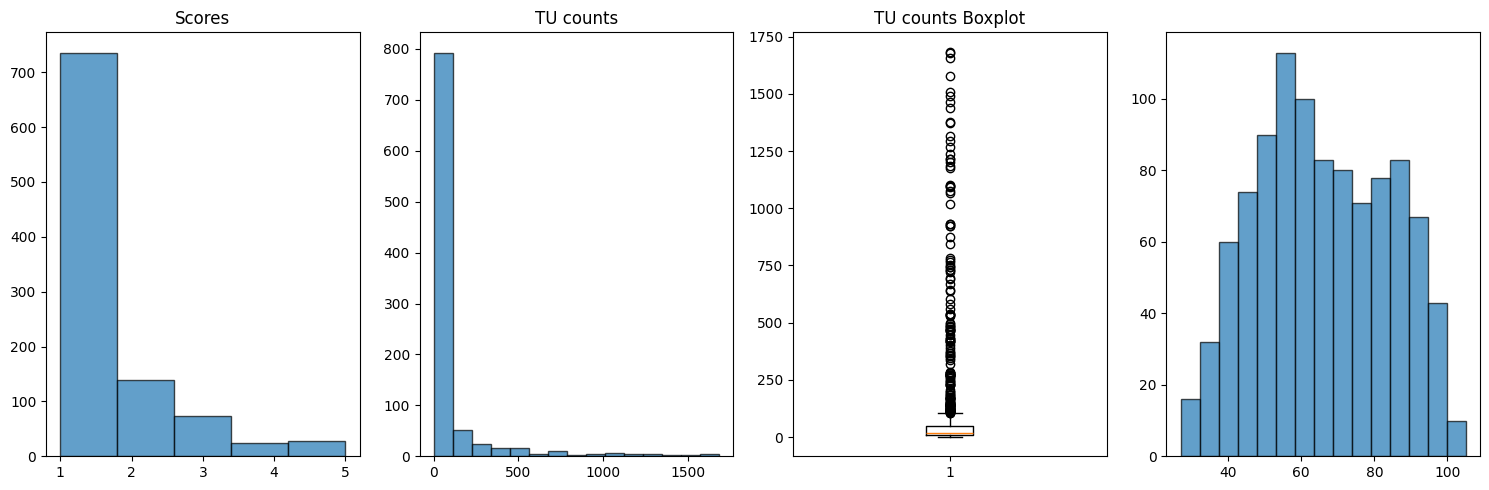

======== WhatsApp =======


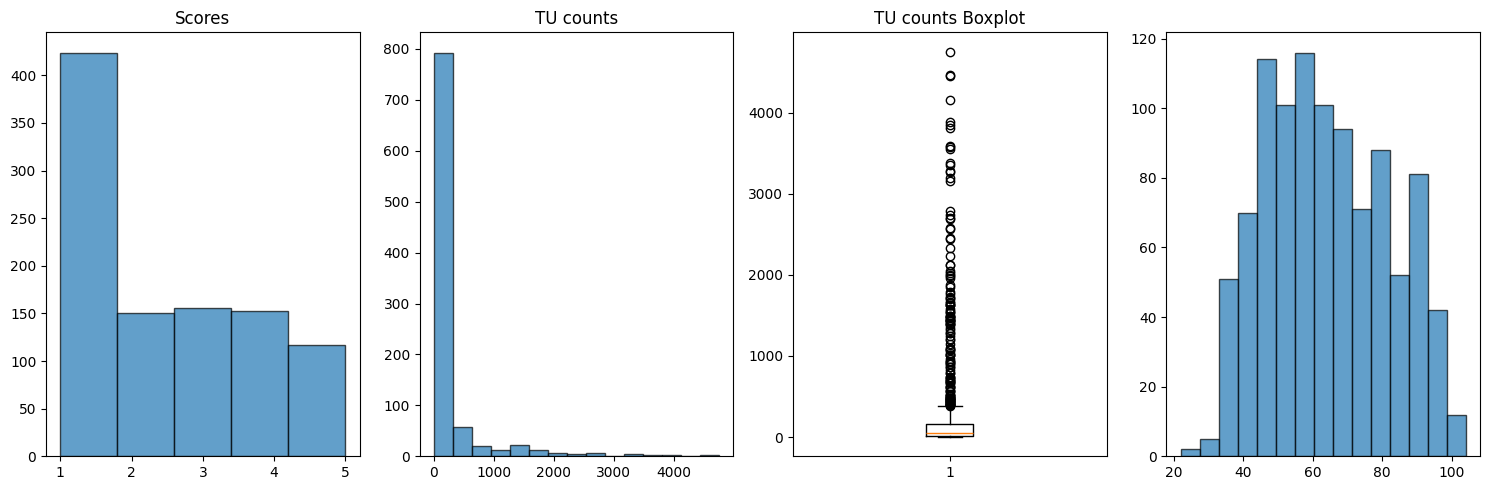

======== Telegram =======


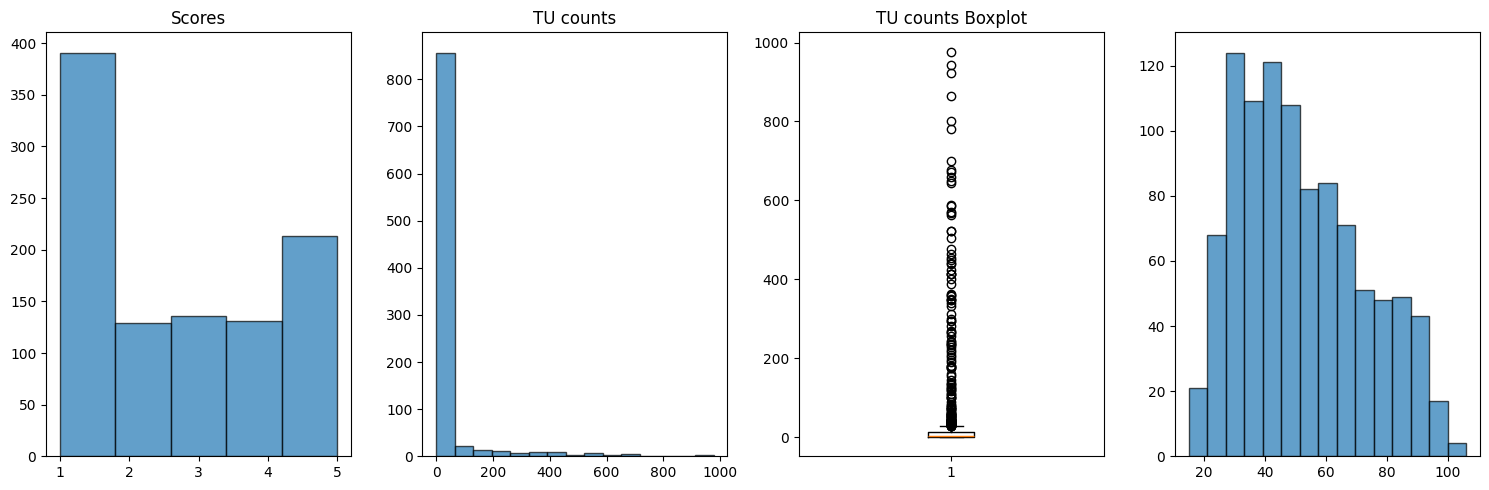

======== Zoom =======


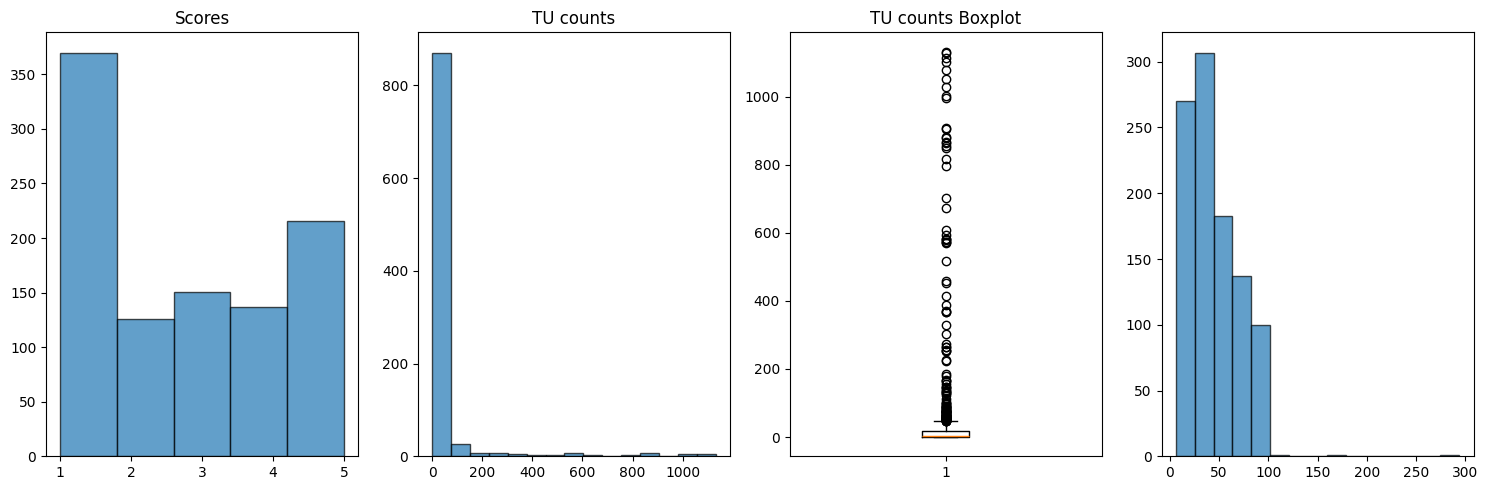

======== Snapchat =======


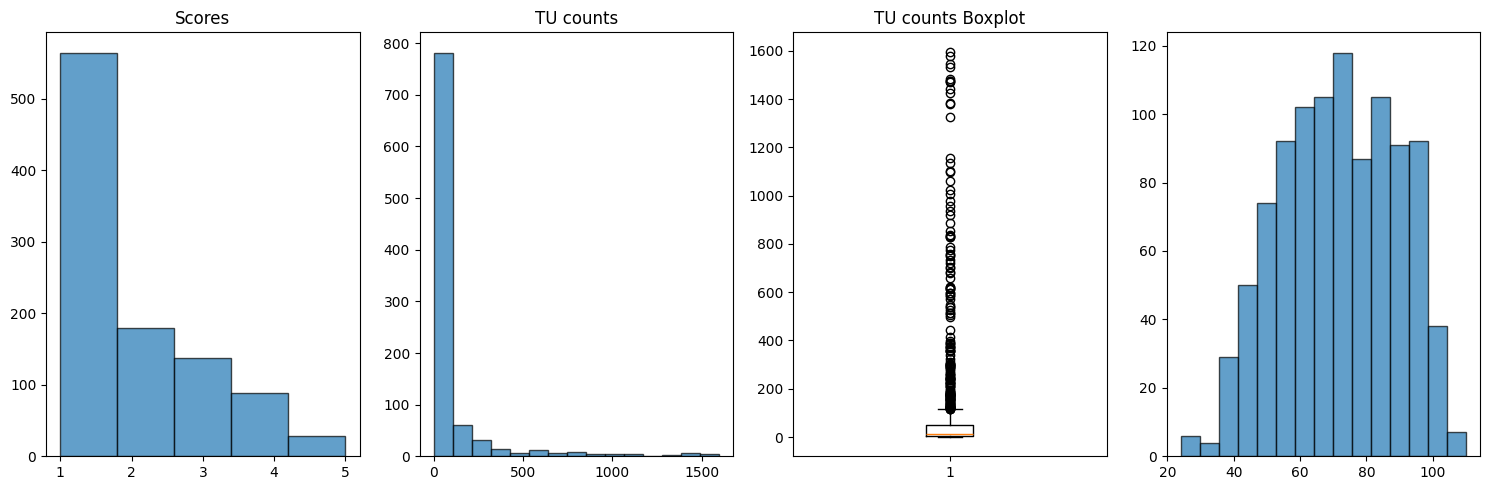

======== Facebook Messenger =======


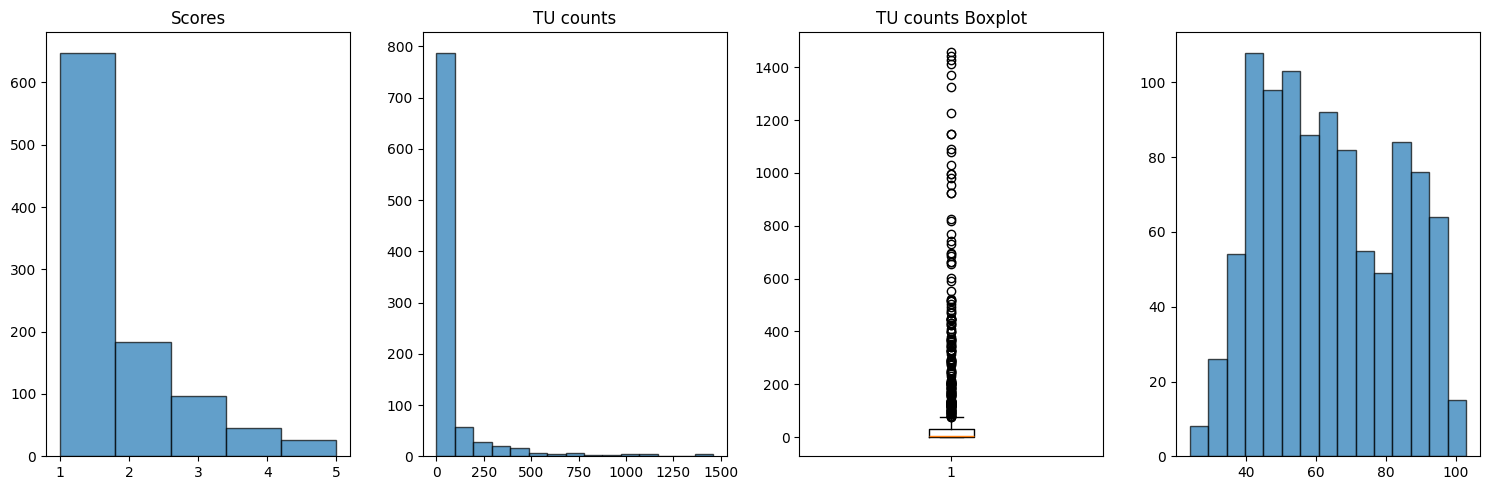

======== CapCut =======


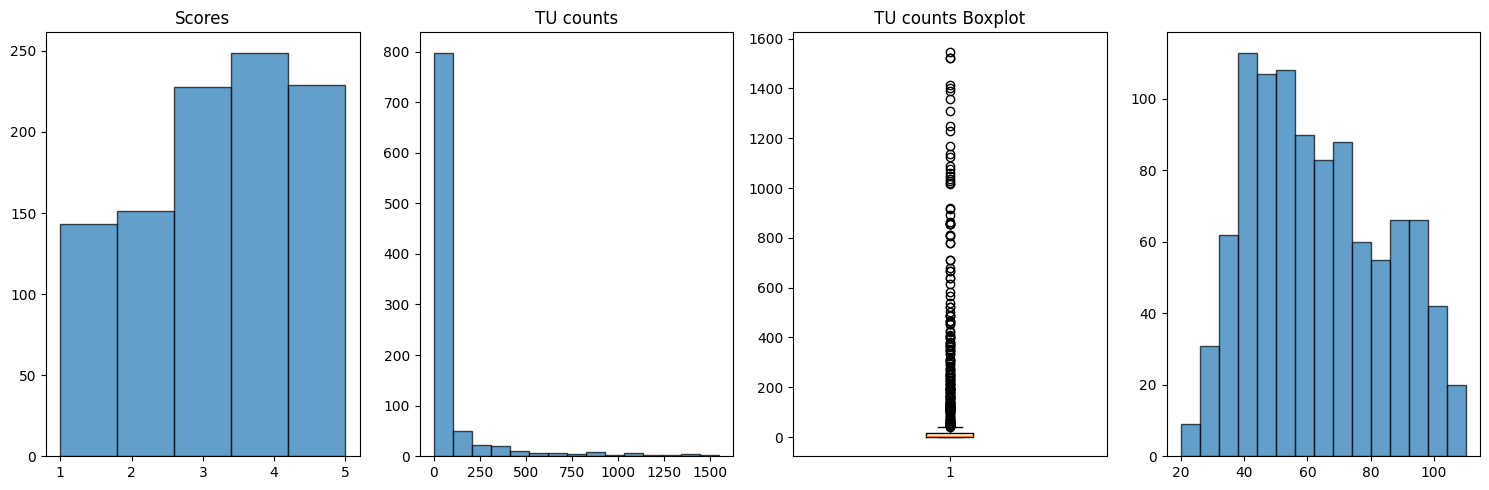

======== Spotify =======


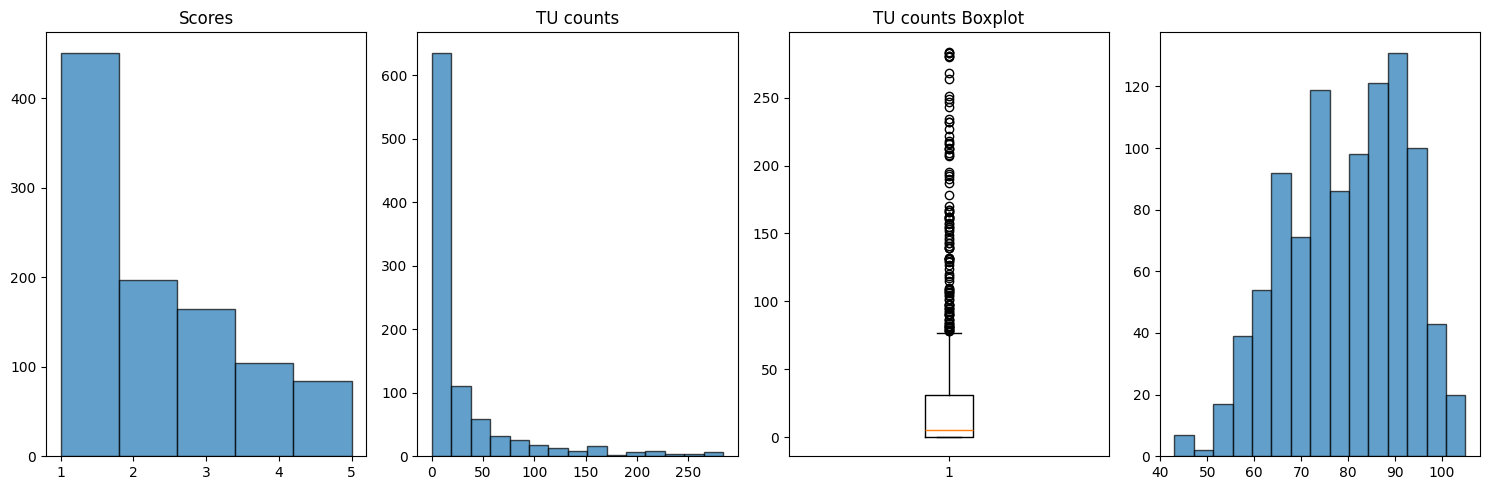

======== YouTube =======


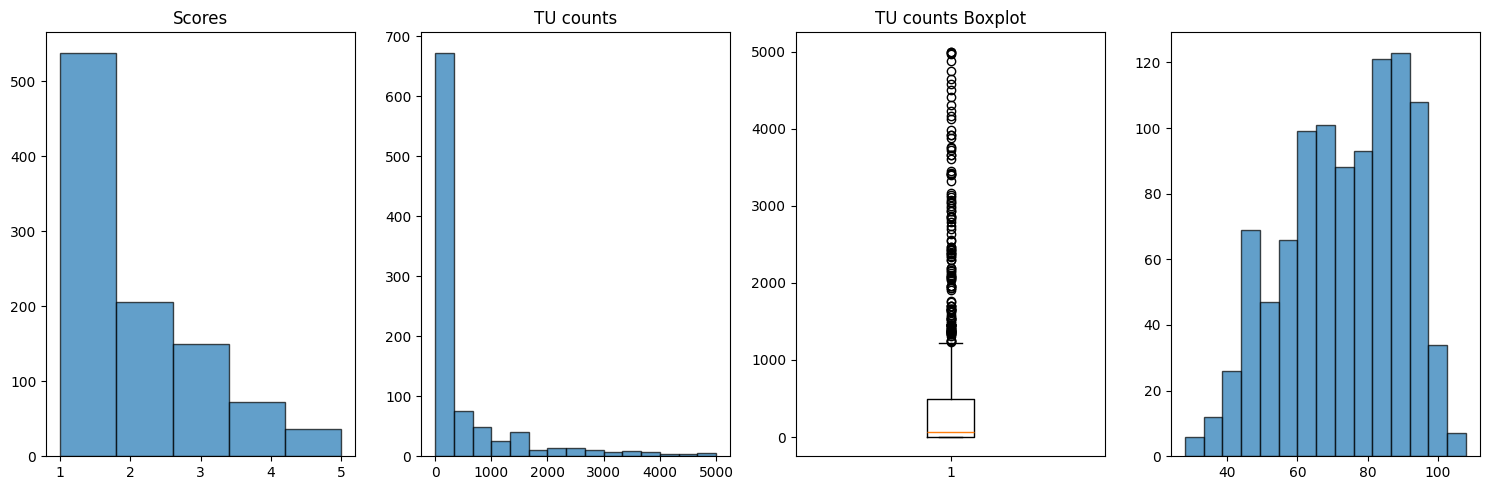

======== HBO Now =======


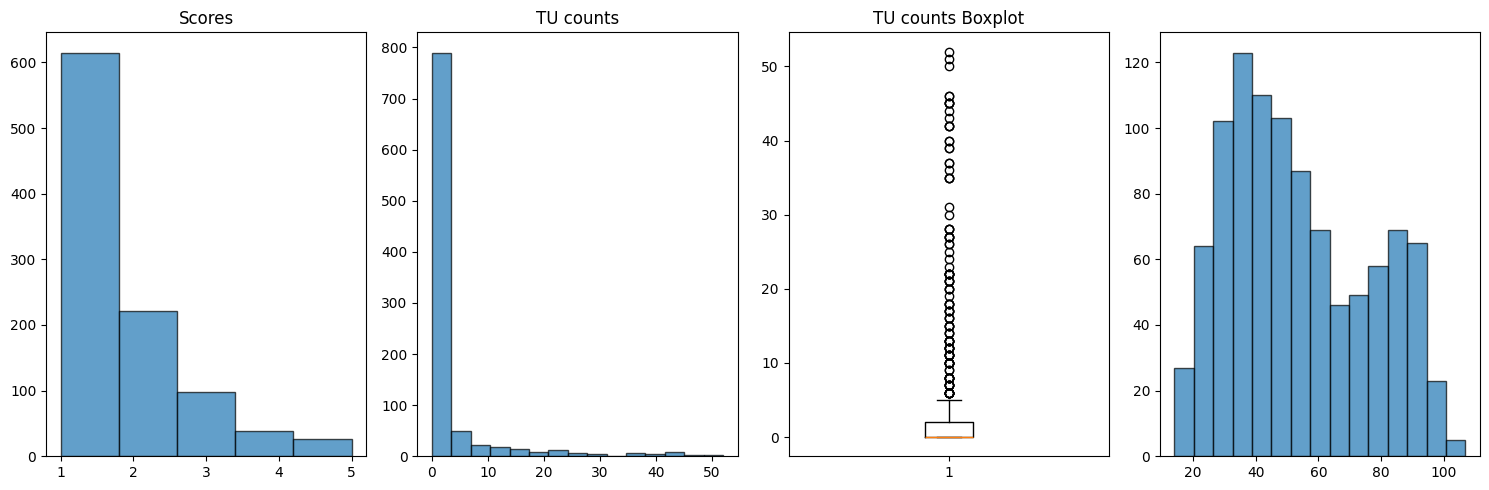

======== Cash App =======


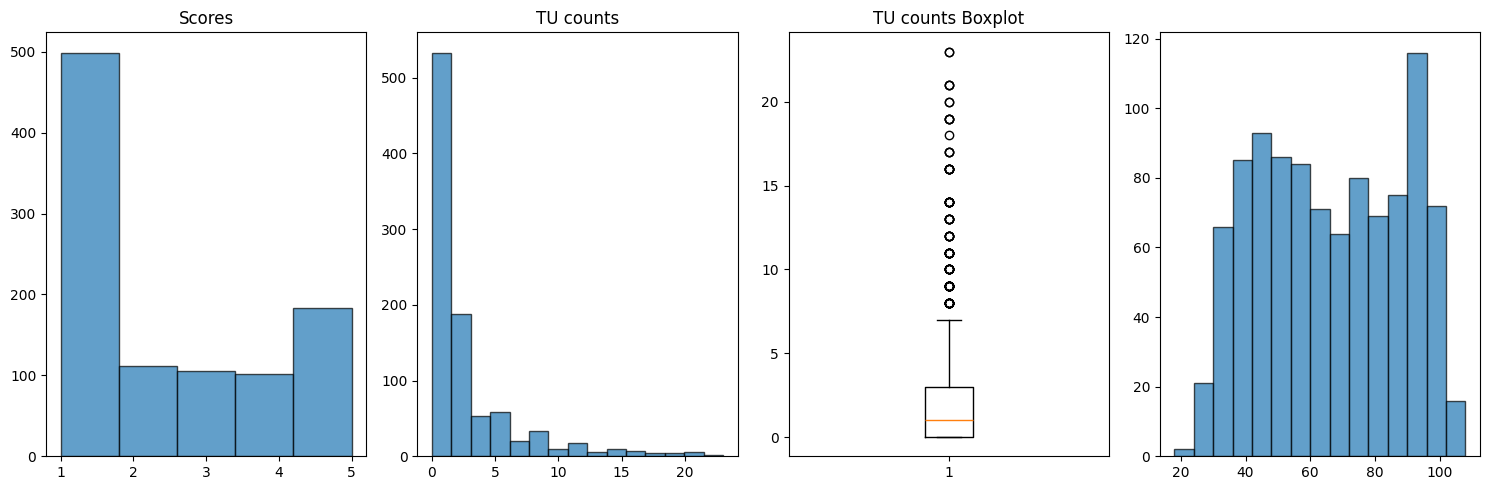

======== Subway Surfers =======


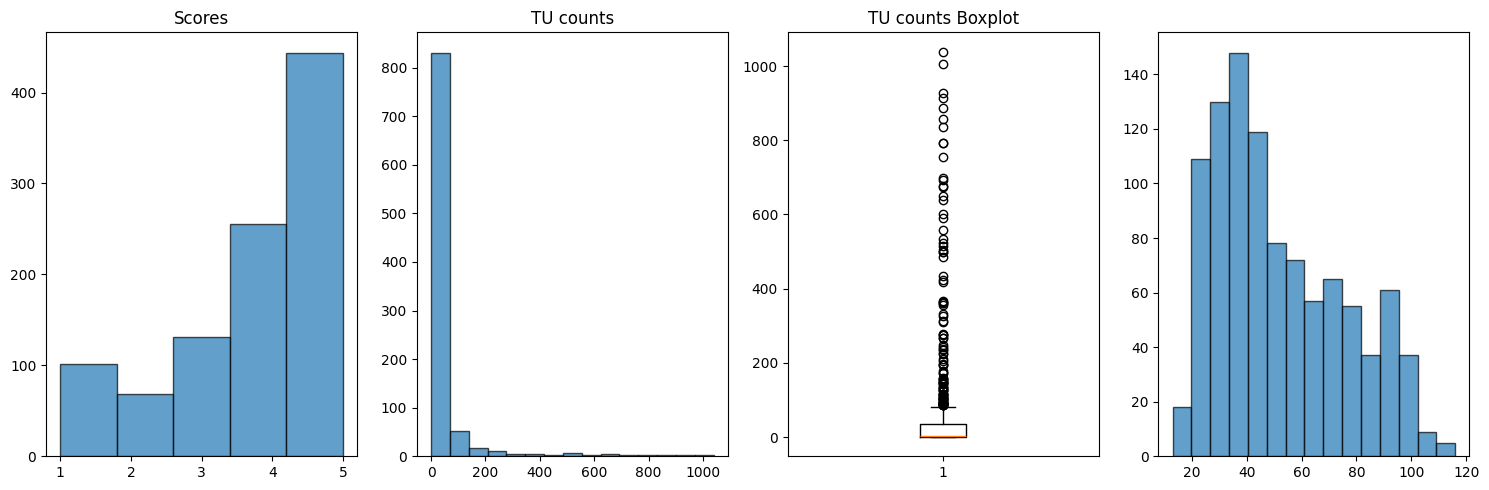

======== Roblox =======


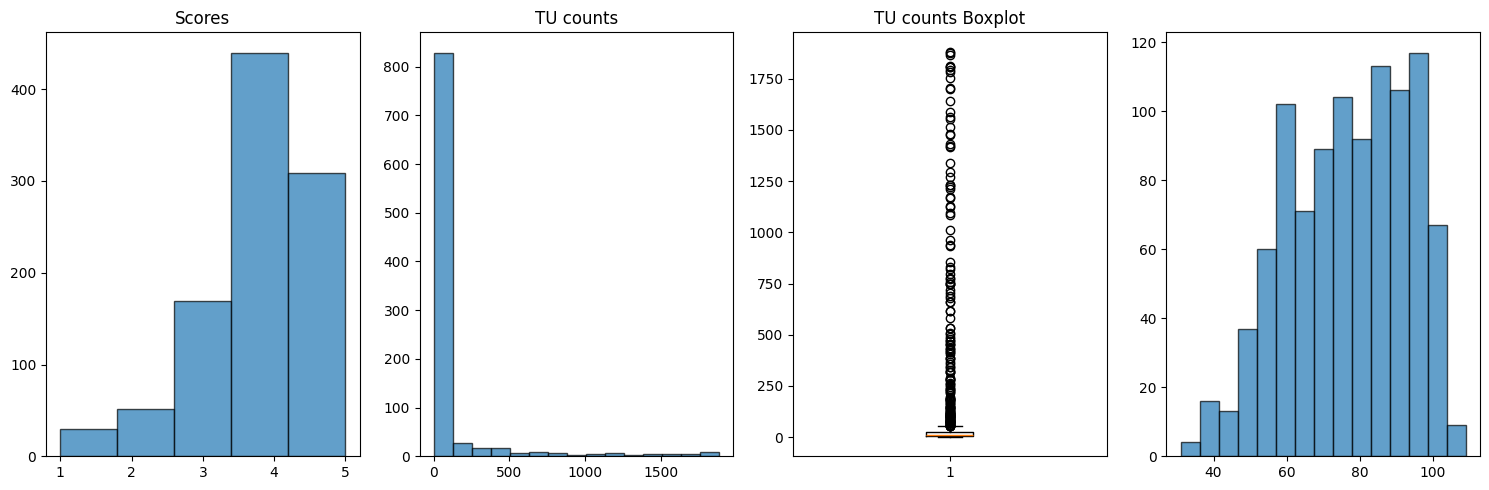

In [19]:
# app_name = 'TikTok'
for app_name in app_names:
    print('========', app_name, '=======')
    cur_df = df[df['app_name'] == app_name]
    full_analysis(cur_df)